In [1]:
import os
path , dirs, files= next(os.walk('train'))
file_count = len(files)
print(file_count)

24980


In [3]:
file_names = os.listdir('train')
print(file_names)

['cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg', 'cat.10050.jpg', 'cat.10051.jpg', 'cat.10052.jpg', 'cat.10053.jpg', 'cat.10054.jpg', 'cat.10055.jpg', 'cat.10056.jpg', 'cat.10057.jpg', 'cat.10058.jpg', 'cat.10059.jpg', 'cat.1006.jpg', 'cat.10060.jpg', 'cat.10061.jpg', 'cat.10062.jpg', 'cat.10063.jpg', 'cat.10064.jpg', 'cat.10065.jpg', 'cat.10066.jpg', 'cat.10067.jpg', '

In [13]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

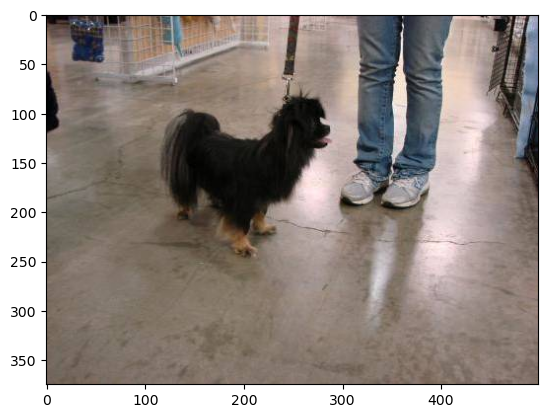

In [14]:
img = mpimg.imread('train/dog.1000.jpg')
plt.imshow(img)

In [15]:
file_names = os.listdir('train/')

for i in range(5):
    name = file_names[i]
    print(name[0:3])

cat
cat
cat
cat
cat


In [16]:
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:
    name = img_file[0:3]

    if name == 'dog':
        dog_count+=1
    else:
        cat_count+=1

print('dog count = ',dog_count)
print('cat count = ',cat_count)

dog count =  12500
cat count =  12480


In [17]:
os.mkdir('image_resized')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'image_resized'

In [21]:
import random
original_folder = 'train/'
resized_folder = 'image_resized/'

random.seed(42)

all_files = os.listdir(original_folder)
selected_files = random.sample(all_files,2000)

for file_name in selected_files:
    img_path = original_folder+file_name

    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    newImgPath= resized_folder+file_name
    img.save(newImgPath)

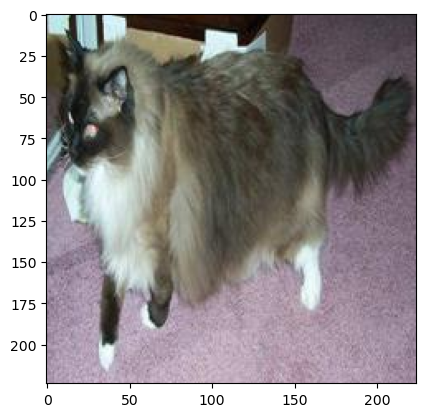

In [22]:
img = mpimg.imread('image_resized/cat.1011.jpg')
plt.imshow(img)

In [25]:
file_names = os.listdir('image_resized/')

labels = []

for i in range(2000):
    name = file_names[i]
    label = name[0:3]

    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [27]:
print(file_names[0:5])
print(len(file_names))

['cat.10026.jpg', 'cat.10030.jpg', 'cat.10048.jpg', 'cat.10064.jpg', 'cat.10078.jpg']
2000


In [29]:
print(labels[1000:1005])
print(len(labels))

[1, 1, 1, 1, 1]
2000


In [31]:
values, counts = np.unique(labels, return_counts= True)
print(values)
print(counts)

[0 1]
[ 980 1020]


In [32]:
import cv2
import glob

In [33]:
image_directory= 'image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e))for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
print(dog_cat_images)

[[[[ 90  68  73]
   [ 78  61  65]
   [ 72  59  67]
   ...
   [126 151 167]
   [112 123 143]
   [ 69  74  95]]

  [[ 83  68  72]
   [ 84  70  76]
   [ 75  67  74]
   ...
   [133 159 175]
   [122 138 155]
   [ 86  98 116]]

  [[ 72  66  71]
   [ 70  66  71]
   [ 63  66  71]
   ...
   [116 148 161]
   [ 97 124 138]
   [ 65  88 103]]

  ...

  [[117 103 107]
   [118 104 108]
   [118 104 108]
   ...
   [129 172 191]
   [126 170 183]
   [ 95 140 151]]

  [[116 102 106]
   [118 104 108]
   [122 108 112]
   ...
   [129 171 184]
   [127 169 174]
   [ 93 137 138]]

  [[109  95  99]
   [114 100 104]
   [123 109 113]
   ...
   [128 169 178]
   [124 165 167]
   [ 89 133 127]]]


 [[[ 13   7   8]
   [ 13   7   8]
   [ 12   6   7]
   ...
   [135 166 165]
   [111 137 131]
   [ 73  97  89]]

  [[ 15   9  10]
   [ 14   8   9]
   [ 13   7   8]
   ...
   [124 163 165]
   [114 151 149]
   [107 142 138]]

  [[ 17  11  12]
   [ 16  10  11]
   [ 14   8   9]
   ...
   [135 193 199]
   [124 179 184]
   [114 169

In [35]:
type(dog_cat_images)

numpy.ndarray

In [36]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [37]:
x = dog_cat_images
y = np.asarray(labels)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [39]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [40]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [41]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
pretrained_model.trainable = False

In [42]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1000)           │     3,538,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,540,986 (13.51 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 3,538,984 (13.50 MB)

In [43]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [44]:
model.fit(x_train_scaled,y_train,epochs=8)

Epoch 1/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.7260 - loss: 1.6895
Epoch 2/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8676 - loss: 0.6614
Epoch 3/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.8711 - loss: 0.6043
Epoch 4/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8887 - loss: 0.5849
Epoch 5/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - accuracy: 0.8721 - loss: 0.5815
Epoch 6/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/step - accuracy: 0.9002 - loss: 0.5448
Epoch 7/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 290ms/step - accuracy: 0.8755 - loss: 0.5470
Epoch 8/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step - accuracy: 0.8900 - loss: 0.5441


In [46]:
score, accuracy = model.evaluate(x_test_scaled,y_test)
print(score)
print(accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.8952 - loss: 0.5356
0.5692114233970642
0.8725000023841858


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[-0.05669573 -0.07210464]]
0
cat


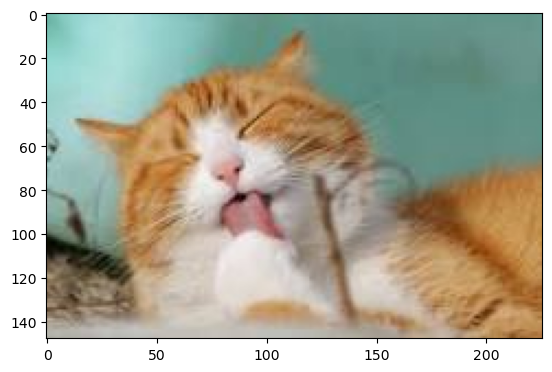

In [53]:
img_path = 'cat.png'
input_image = cv2.imread(img_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
img_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(img_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
    print('cat')
else:
    print('dog')